# Proyecto Semestral

Prueba de Long Short Term Memory: https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/ 

In [97]:
import yfinance as yf
from datetime import date

# msft = yf.Ticker("MSFT")
# msft.
df = yf.download("BABA", start="2010-01-01", end=date.today()).reset_index().round(2)
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-19,92.70,99.70,89.95,93.89,93.89,271879400
1,2014-09-22,92.70,92.95,89.50,89.89,89.89,66657800
2,2014-09-23,88.94,90.48,86.62,87.17,87.17,39009800
3,2014-09-24,88.47,90.57,87.22,90.57,90.57,32088000
4,2014-09-25,91.09,91.50,88.50,88.92,88.92,28598000


In [101]:
df.rename(columns = {'Adj Close':'Dividend'}, inplace = True)
df['Dividend'] = (df['Close'] != df['Dividend'])
# df['']
df.head()

,Date,Open,High,Low,Close,Dividend,Volume
0,2014-09-19,92.70,99.70,89.95,93.89,True,271879400
1,2014-09-22,92.70,92.95,89.50,89.89,True,66657800
2,2014-09-23,88.94,90.48,86.62,87.17,True,39009800
3,2014-09-24,88.47,90.57,87.22,90.57,True,32088000
4,2014-09-25,91.09,91.50,88.50,88.92,True,28598000


In [85]:
# #import packages
# import pandas as pd
# import numpy as np

# #to plot within notebook
# import matplotlib.pyplot as plt
# %matplotlib inline

# #setting figure size
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 20,10

# #for normalizing data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))

# #read the file
# df = pd.read_csv('./Datasets/NSE-TATAGLOBAL11.csv').reset_index().drop('index',axis=1)

# #print the head
# df.head()

In [103]:
close_price = df.Close.to_numpy()
df.loc[1:, 'Lags'] = close_price[:-1]
df.head()

,Date,Open,High,Low,Close,Dividend,Volume,Lags
0,2014-09-19,92.70,99.70,89.95,93.89,True,271879400,NaN
1,2014-09-22,92.70,92.95,89.50,89.89,True,66657800,93.89
2,2014-09-23,88.94,90.48,86.62,87.17,True,39009800,89.89
3,2014-09-24,88.47,90.57,87.22,90.57,True,32088000,87.17
4,2014-09-25,91.09,91.50,88.50,88.92,True,28598000,90.57


In [106]:
# Vemos diferencias
df['Close Diff'] = df['Close'] - df['Lags']
df['Close Percentage Diff'] = (df['Close'] - df['Lags'])/df['Lags']

# Número de subidas
df['Rise'] = df['Close Diff'] > 0 
df['Drop'] = df['Close Diff'] < 0
df.head()

,Date,Open,High,Low,Close,Dividend,Volume,Lags,Close Diff,Close Percentage Diff,Rise,Drop
0,2014-09-19,92.70,99.70,89.95,93.89,True,271879400,NaN,NaN,NaN,False,False
1,2014-09-22,92.70,92.95,89.50,89.89,True,66657800,93.89,-4.00,-0.042603,False,True
2,2014-09-23,88.94,90.48,86.62,87.17,True,39009800,89.89,-2.72,-0.030259,False,True
3,2014-09-24,88.47,90.57,87.22,90.57,True,32088000,87.17,3.40,0.039004,True,False
4,2014-09-25,91.09,91.50,88.50,88.92,True,28598000,90.57,-1.65,-0.018218,False,True


In [36]:
df['Date'] = pd.to_datetime(df.Date)

df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Close Lag,Close Diff
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83,209.20,5.95
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06,218.20,-9.00
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79,227.60,-9.40
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27,230.90,-3.30
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05,233.75,-2.85


In [42]:
# Información de fecha
df['Day']   = df.Date.dt.day
df['Month'] = df.Date.dt.month
df['Year']  = df.Date.dt.year
df['Week Day'] = df.Date.dt.day_of_week
df['Year Day'] = df.Date.dt.day_of_year
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Close Lag,Close Diff,Day,Month,Year,Week Day,Year Day
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83,209.20,5.95,8,10,2018,0,281
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06,218.20,-9.00,5,10,2018,4,278
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79,227.60,-9.40,4,10,2018,3,277
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27,230.90,-3.30,3,10,2018,2,276
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05,233.75,-2.85,1,10,2018,0,274


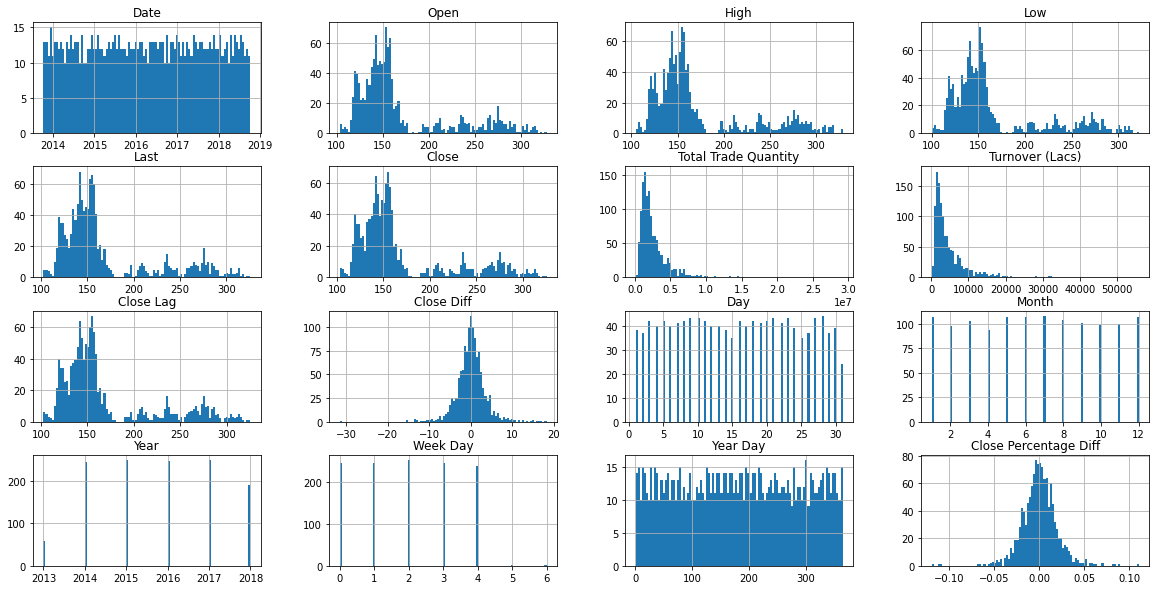

In [48]:
#
import matplotlib.pyplot as plt 

df.hist(bins=100)
plt.show()

[]

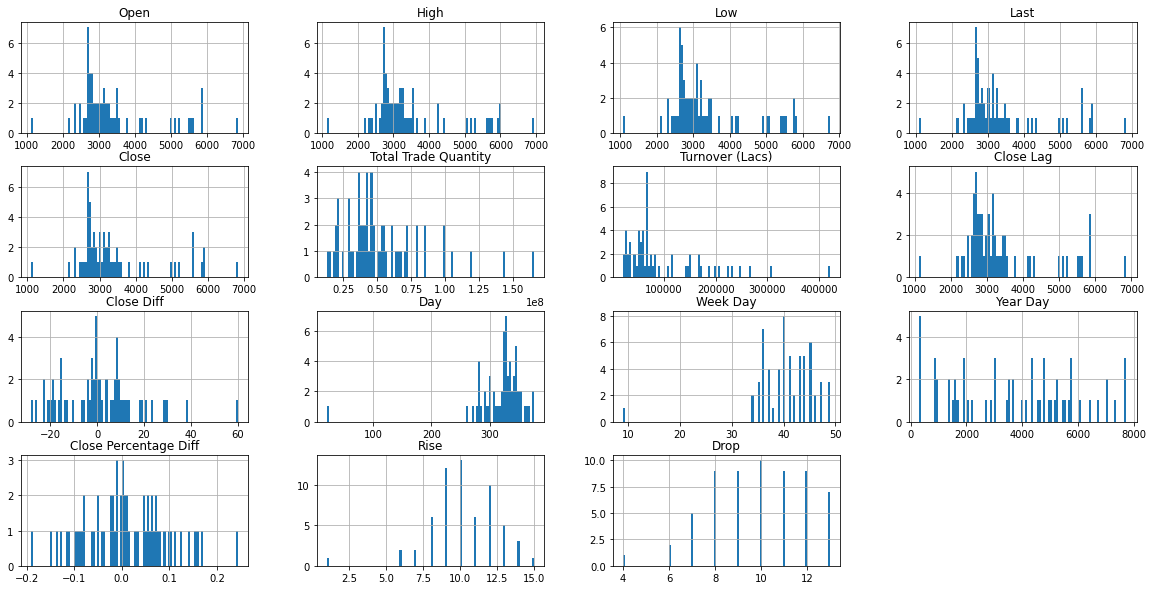

In [56]:
gb = df.groupby(['Year', 'Month'])
gb.sum().hist(bins=100)
plt.plot()

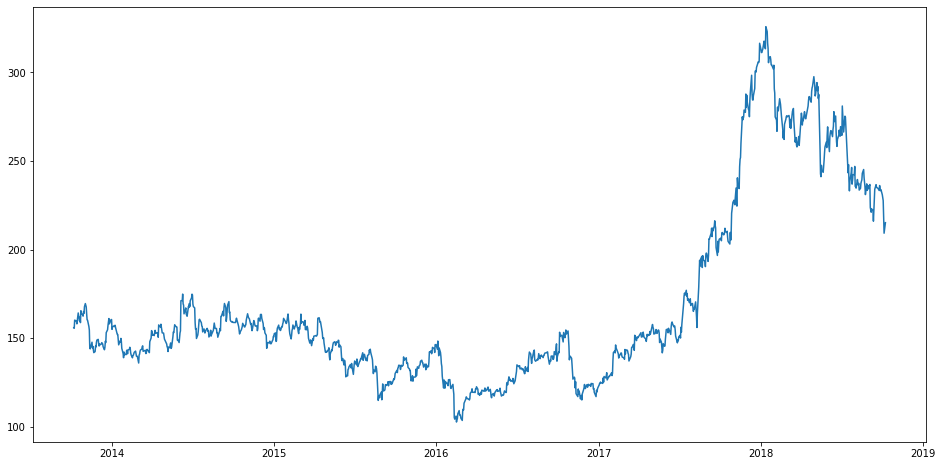

In [13]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
plt.show()

In [14]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [11]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
closing_price

NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported